In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
monitoring_cultures = "../data/monitoring_cultures.csv"

data = pd.read_csv(monitoring_cultures)
df = pd.DataFrame(data)

In [36]:
df.shape

(14652, 9)

In [43]:
df.tail()

,date,parcelle_id,culture,ndvi,lai,stress_hydrique,biomasse_estimee,latitude,longitude
14647,2024-12-27,P050,Mais,0.447,0.23,0.028,1.02,33.860865,-5.557231
14648,2024-12-28,P050,Mais,0.382,0.57,0.149,2.19,33.860865,-5.557231
14649,2024-12-29,P050,Mais,0.383,0.57,0.089,2.17,33.860865,-5.557231
14650,2024-12-30,P050,Mais,0.420,0.57,0.198,2.40,33.860865,-5.557231
14651,2024-12-31,P050,Mais,0.396,0.49,0.191,1.95,33.860865,-5.557231


In [38]:
np.unique(df["parcelle_id"])

array(['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008',
       'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'P024',
       'P025', 'P026', 'P027', 'P028', 'P029', 'P030', 'P031', 'P032',
       'P033', 'P034', 'P035', 'P036', 'P037', 'P038', 'P039', 'P040',
       'P041', 'P042', 'P043', 'P044', 'P045', 'P046', 'P047', 'P048',
       'P049', 'P050'], dtype=object)

In [8]:
np.unique(df.duplicated())

array([False])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              14652 non-null  object 
 1   parcelle_id       14652 non-null  object 
 2   culture           14652 non-null  object 
 3   ndvi              14652 non-null  float64
 4   lai               14652 non-null  float64
 5   stress_hydrique   14652 non-null  float64
 6   biomasse_estimee  14652 non-null  float64
 7   latitude          14652 non-null  float64
 8   longitude         14652 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [10]:
df.describe()

,ndvi,lai,stress_hydrique,biomasse_estimee,latitude,longitude
count,14652.000000,14652.000000,14652.000000,14652.000000,14652.000000,14652.000000
mean,0.502501,2.273703,0.082619,15.090882,33.878143,-5.552722
std,0.199080,1.987653,0.066503,16.997077,0.022138,0.018199
min,0.125000,0.100000,0.001000,0.130000,33.847741,-5.578778
25%,0.335000,0.560000,0.036000,1.837500,33.857681,-5.564957
50%,0.449000,1.540000,0.064000,6.570000,33.867508,-5.558493
75%,0.662000,3.860000,0.109000,25.520000,33.900245,-5.526781
max,0.990000,7.710000,0.506000,70.640000,33.908533,-5.520482


In [15]:
np.unique(df["culture"])

array(['Ble', 'Mais', 'Tournesol'], dtype=object)

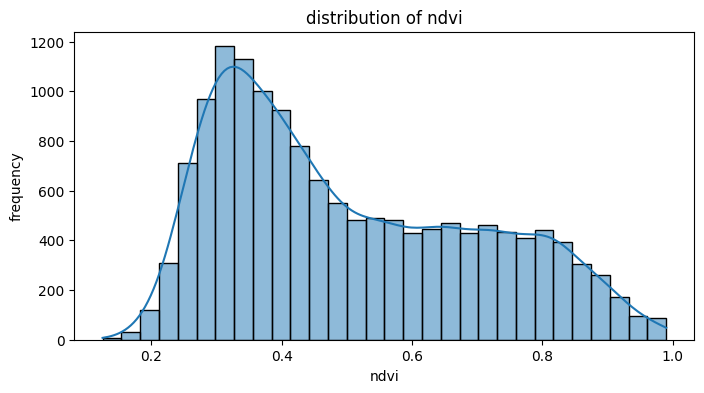

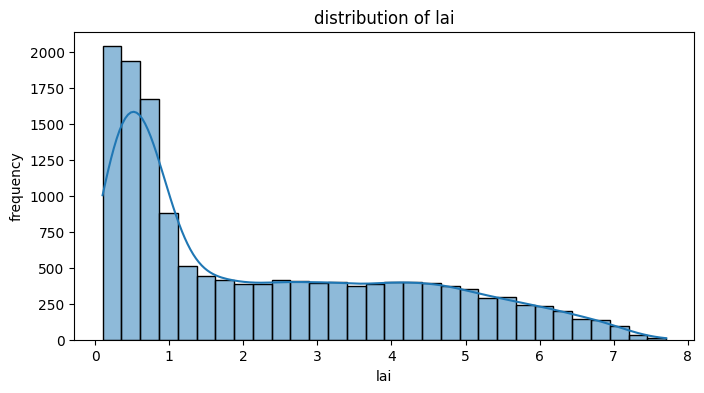

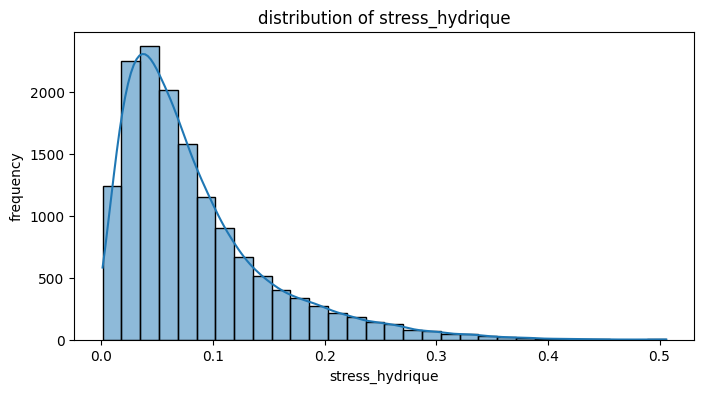

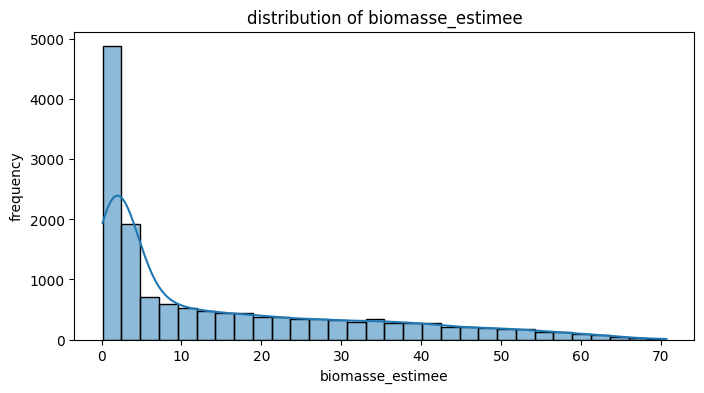

In [24]:
_columns = df.drop(columns=["parcelle_id", "culture", "date", "latitude", "longitude"]).columns

for col in _columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

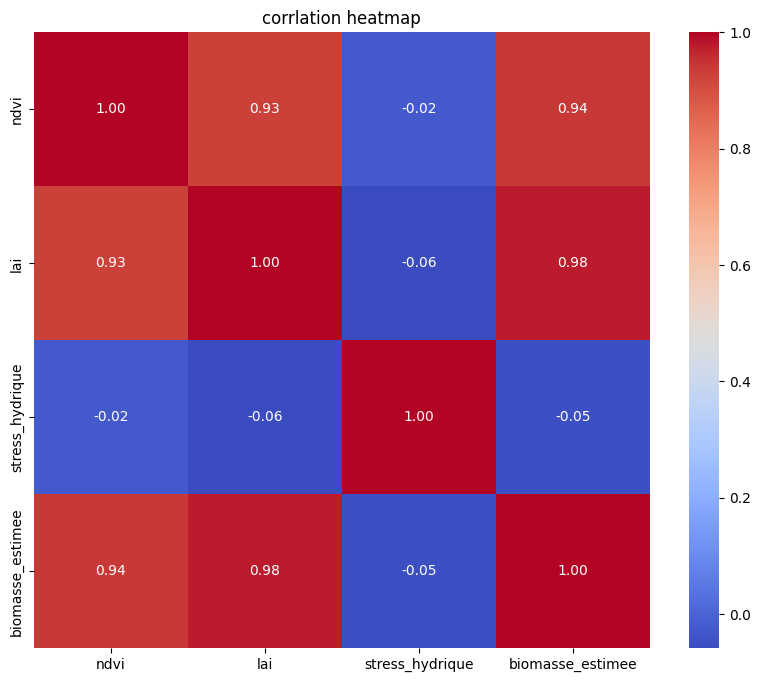

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("corrlation heatmap")
plt.show()

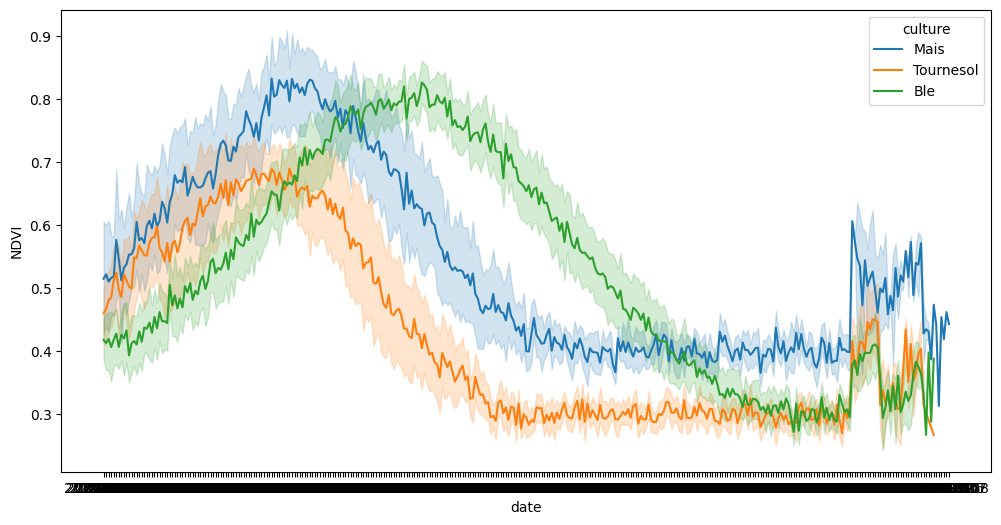

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='ndvi', hue="culture")
plt.xlabel("date")
plt.ylabel("NDVI")
plt.legend(title="culture")
plt.show()